In [2]:
import matplotlib.pyplot as plt
import pandas as pd

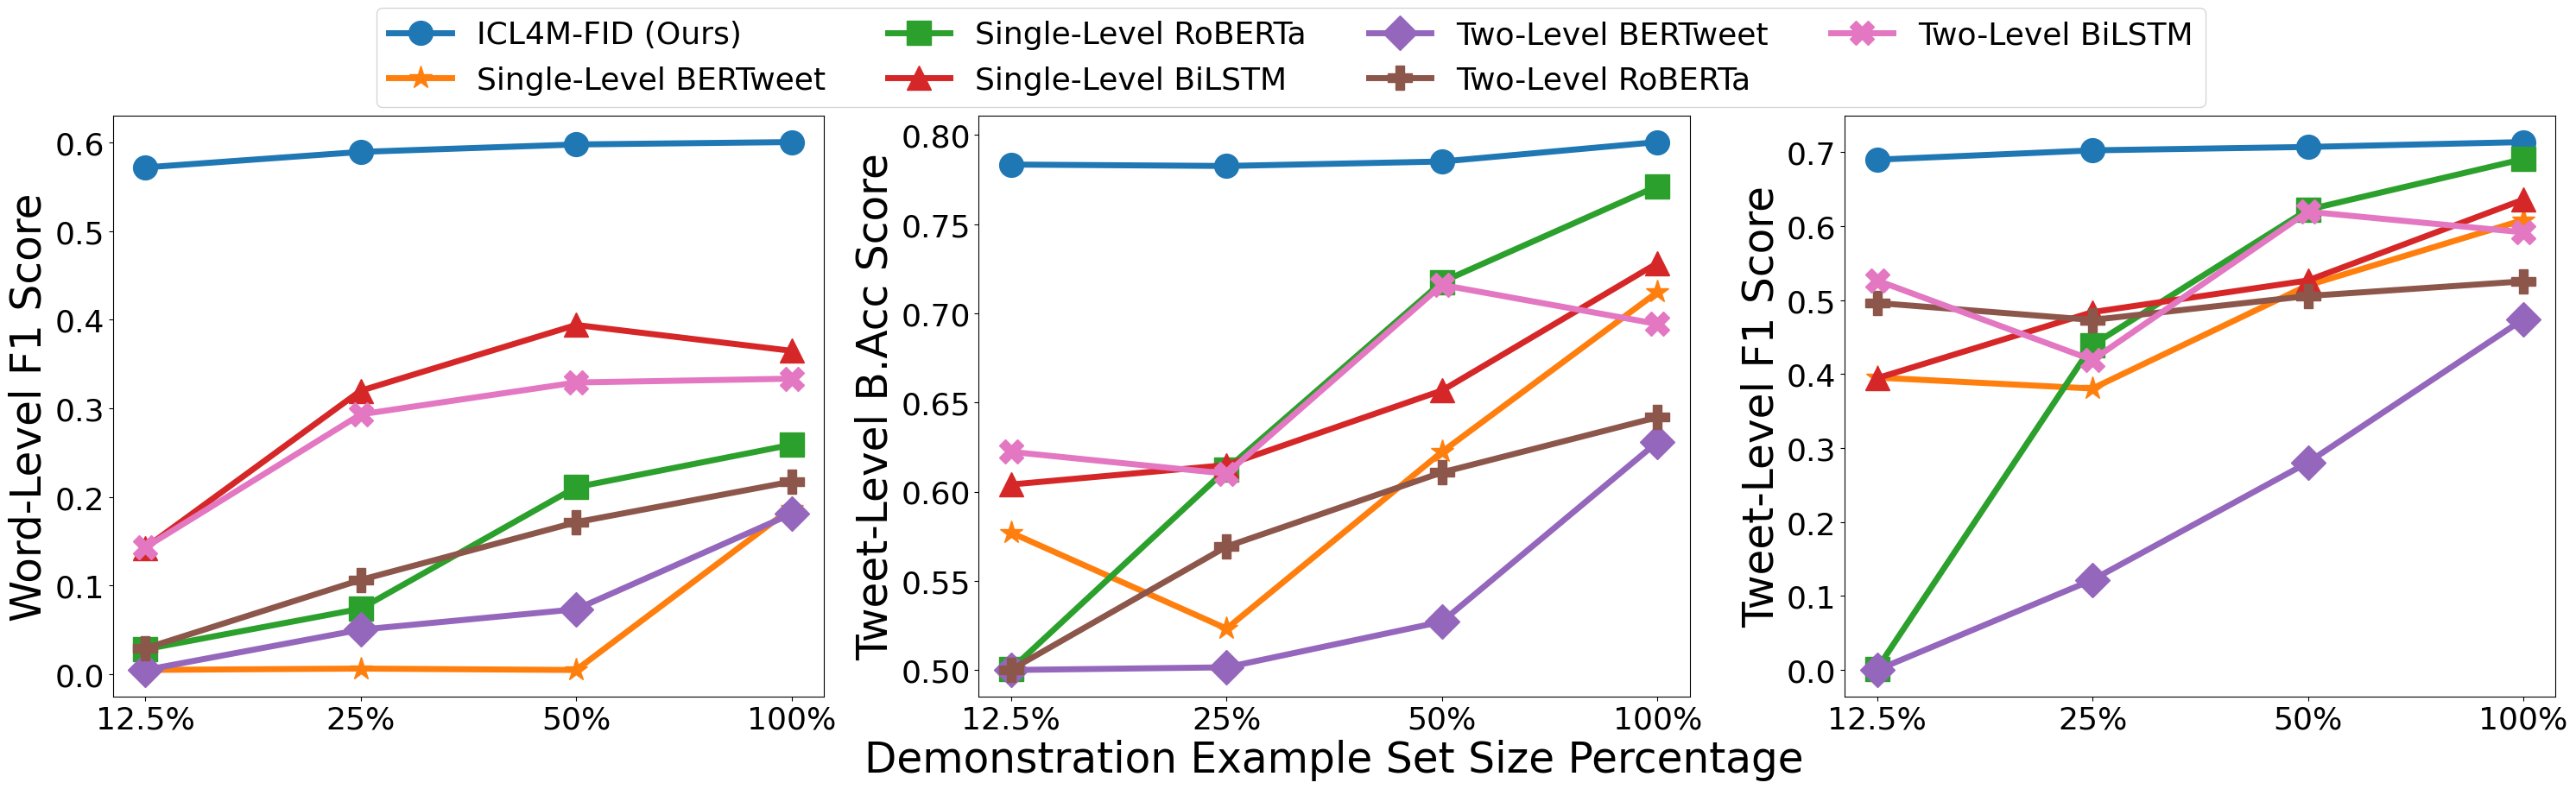

In [4]:
data = {
    "Method": [
        "ICL4M-FID (Ours)", "Single-Level BERTweet", "Single-Level RoBERTa", "Single-Level BiLSTM",
        "Two-Level BERTweet", "Two-Level RoBERTa", "Two-Level BiLSTM"
    ],
    "12.5%": [0.69, 0.3954, 0.0016, 0.3945, 0, 0.4963, 0.5267],
    "25%": [0.7026, 0.3806, 0.4394, 0.4839, 0.1219, 0.4733, 0.4192],
    "50%": [0.7072, 0.5201, 0.6224, 0.5267, 0.2806, 0.5057, 0.6197],
    "100%": [0.7138, 0.6085, 0.6908, 0.636, 0.4742, 0.5255, 0.5918],
}

balanced_acc_data = {
    "Method": [
        "ICL4M-FID (Ours)", "Single-Level BERTweet", "Single-Level RoBERTa", "Single-Level BiLSTM",
        "Two-Level BERTweet", "Two-Level RoBERTa", "Two-Level BiLSTM"
    ],
    "12.5%": [0.7834, 0.577, 0.5004, 0.604, 0.5, 0.5002, 0.6223],
    "25%": [0.7826, 0.5232, 0.6126, 0.6149, 0.5015, 0.5692, 0.6101],
    "50%": [0.7851, 0.6223, 0.7176, 0.6567, 0.5271, 0.6108, 0.7159],
    "100%": [0.796, 0.7119, 0.7713, 0.7281, 0.6278, 0.6417, 0.694],
    
}

token_f1_data = {
    "Method": [
        "ICL4M-FID (Ours)", "Single-Level BERTweet", "Single-Level RoBERTa", "Single-Level BiLSTM",
        "Two-Level BERTweet", "Two-Level RoBERTa", "Two-Level BiLSTM"
    ],
    "12.5%": [0.5722, 0.0045, 0.0278, 0.1424, 0.0044, 0.0288, 0.1428],
    "25%": [0.5897, 0.006, 0.0736, 0.3199, 0.05, 0.1062, 0.2932],
    "50%": [0.5981, 0.0044, 0.2109, 0.3942, 0.073, 0.1713, 0.3292],
    "100%": [0.6008, 0.1873, 0.2589, 0.365, 0.1808, 0.2172, 0.3335],
    
}

fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(30, 8))

name_list = ['Word-Level F1 Score', 'Tweet-Level B.Acc Score', 'Tweet-Level F1 Score']

marker_list = ['o', '*', 's', '^', 'D', 'P', 'X']
for i, the_data in enumerate([token_f1_data, balanced_acc_data, data]):

    df = pd.DataFrame(the_data)

    # Set the 'Method' column as the index for easier plotting
    df.set_index('Method', inplace=True)
    
    for e, method in enumerate(df.index):
        axes[i].plot(df.columns, df.loc[method], marker=marker_list[e], label=method, markersize=20, linewidth=5)
    
    axes[i].tick_params(axis='both', which='major', labelsize=26)
    
    axes[i].set_ylabel(f'{name_list[i]}', fontsize=35)
    if i == 1:
        axes[i].set_xlabel('Demonstration Example Set Size Percentage', fontsize=35)
        handles, labels = axes[i].get_legend_handles_labels()
        fig.legend(handles, labels, bbox_to_anchor=(0.5, 1.16), loc='upper center', ncol=4, fontsize=26)
        # axes[i].legend(bbox_to_anchor=(-1.1, 1.01), loc='lower left', ncol=7, fontsize=15)

plt.tight_layout()
plt.savefig("T3_size_ratio.pdf", bbox_inches="tight")
plt.show()

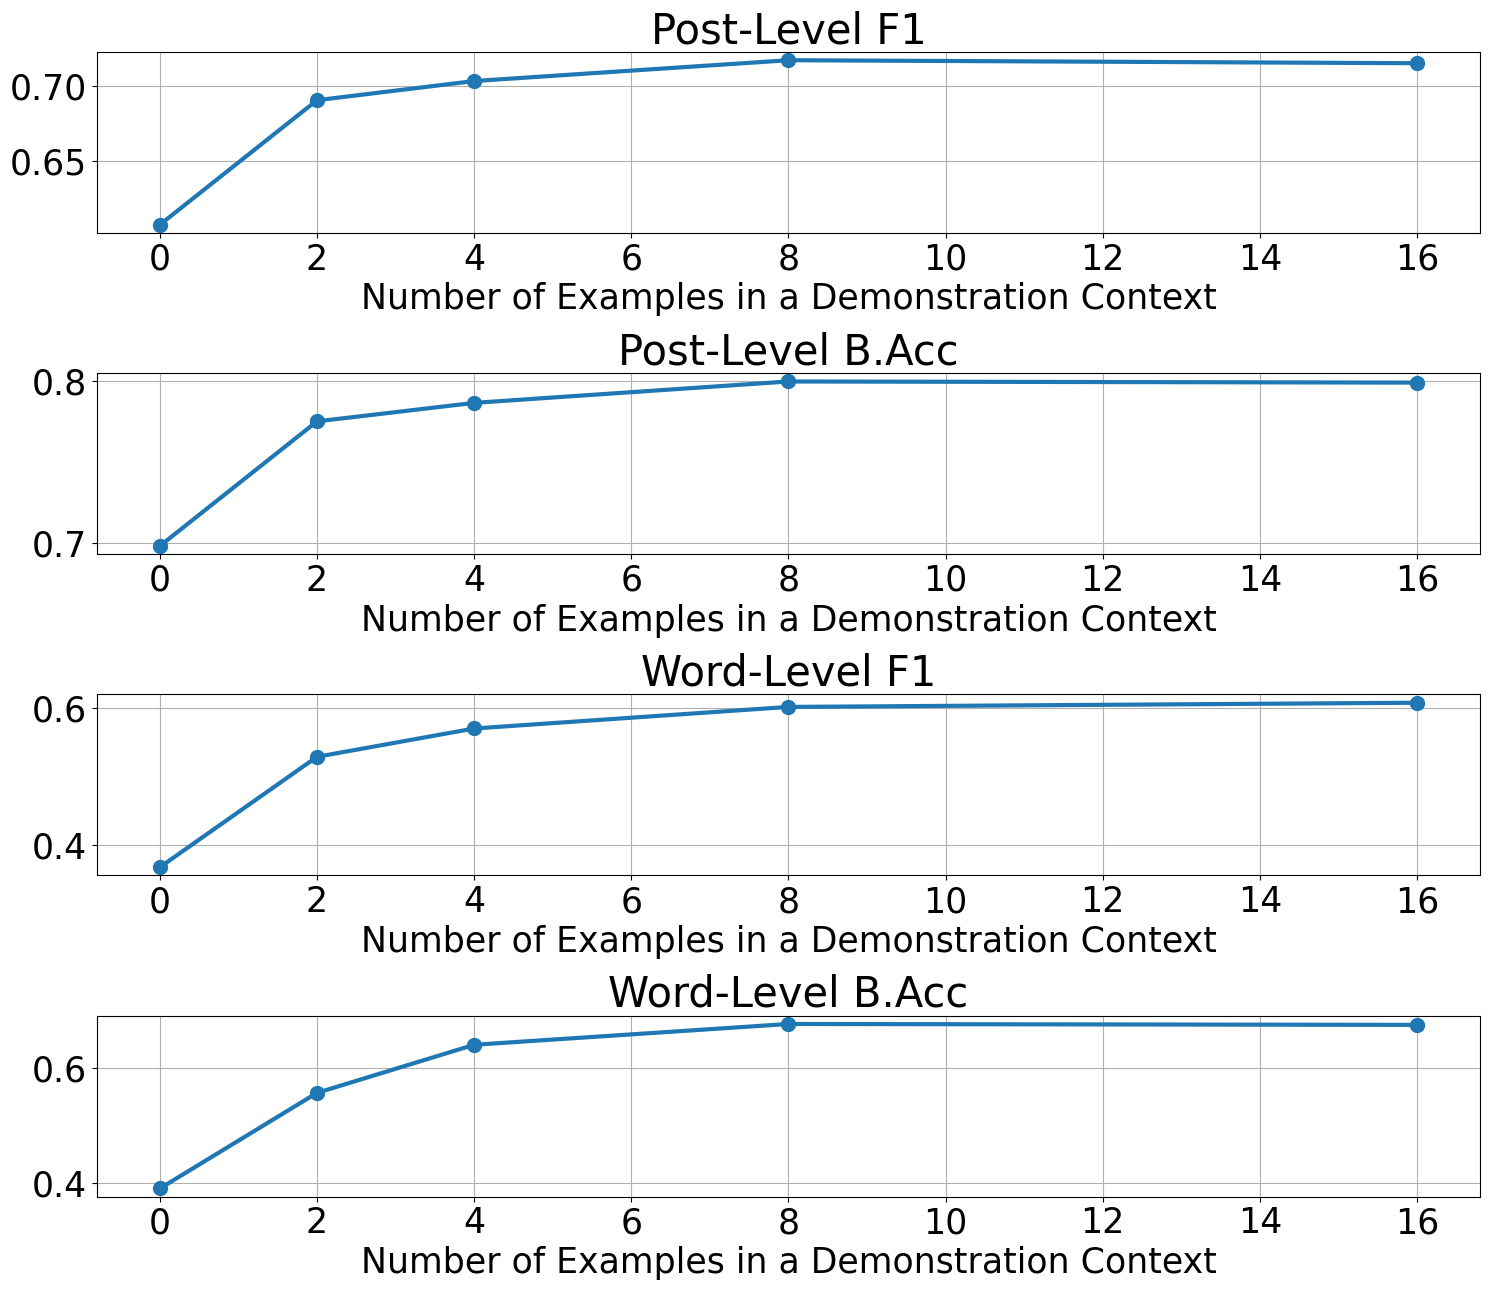

In [65]:
import matplotlib.pyplot as plt
import numpy as np

# Data provided by the user
number_of_examples = np.array(["0", "2", "4", "8", "16"])
number_of_examples = np.array([0, 2, 4, 8, 16])
x_values= np.arange(len(number_of_examples))
metrics = {
    "Post-Level F1": np.array([0.6072, 0.6904, 0.7032, 0.7171, 0.7151]),
    "Post-Level B.Acc": np.array([0.6984, 0.7753, 0.7867, 0.7999, 0.7992]),
    "Word-Level F1": np.array([0.3677, 0.5284, 0.5696, 0.6010, 0.6071]),
    "Word-Level B.Acc": np.array([0.3906, 0.5565, 0.6399, 0.6760, 0.6744]),
}
error = {
    "Post-Level B.Acc": np.array([0.0083, 0.0062, 0.0059, 0.0058, 0.0060]),
    "Post-Level F1": np.array([0.0117, 0.0096, 0.0092, 0.0093, 0.0098]),
    "Word-Level F1": np.array([0.0083, 0.0093, 0.0089, 0.0088, 0.0088]),
    "Word-Level B.Acc": np.array([0.0107, 0.0121, 0.0110, 0.0110, 0.0110]),
}

# Creating subplots
fig, axs = plt.subplots(4, 1, figsize=(15, 13))

# Plot each metric with its error
for i, (key, ax) in enumerate(zip(metrics.keys(), axs.flatten())):
    # ax.errorbar(number_of_examples, metrics[key], yerr=error[key], fmt='-o', capsize=5, label=key)
    ax.plot(number_of_examples, metrics[key], marker='o',markersize=10, linewidth=3)
    ax.tick_params(axis='y', which='major', labelsize=25)
    ax.tick_params(axis='x', which='major', labelsize=25)
    ax.set_title(key, fontsize=30)
    ax.set_xlabel('Number of Examples in a Demonstration Context', fontsize=25)
    # ax.set_ylabel(key.split(' ')[1], fontsize=15)
    ax.grid(True)
    # ax.legend()

plt.tight_layout()
plt.savefig("T3_n_examples.pdf", bbox_inches="tight")
plt.show()


In [20]:
default_list = plt.rcParams['axes.prop_cycle'].by_key()['color']
new_color_list = default_list.copy()
new_color_list[0] = default_list[1]
new_color_list[1] = default_list[0]

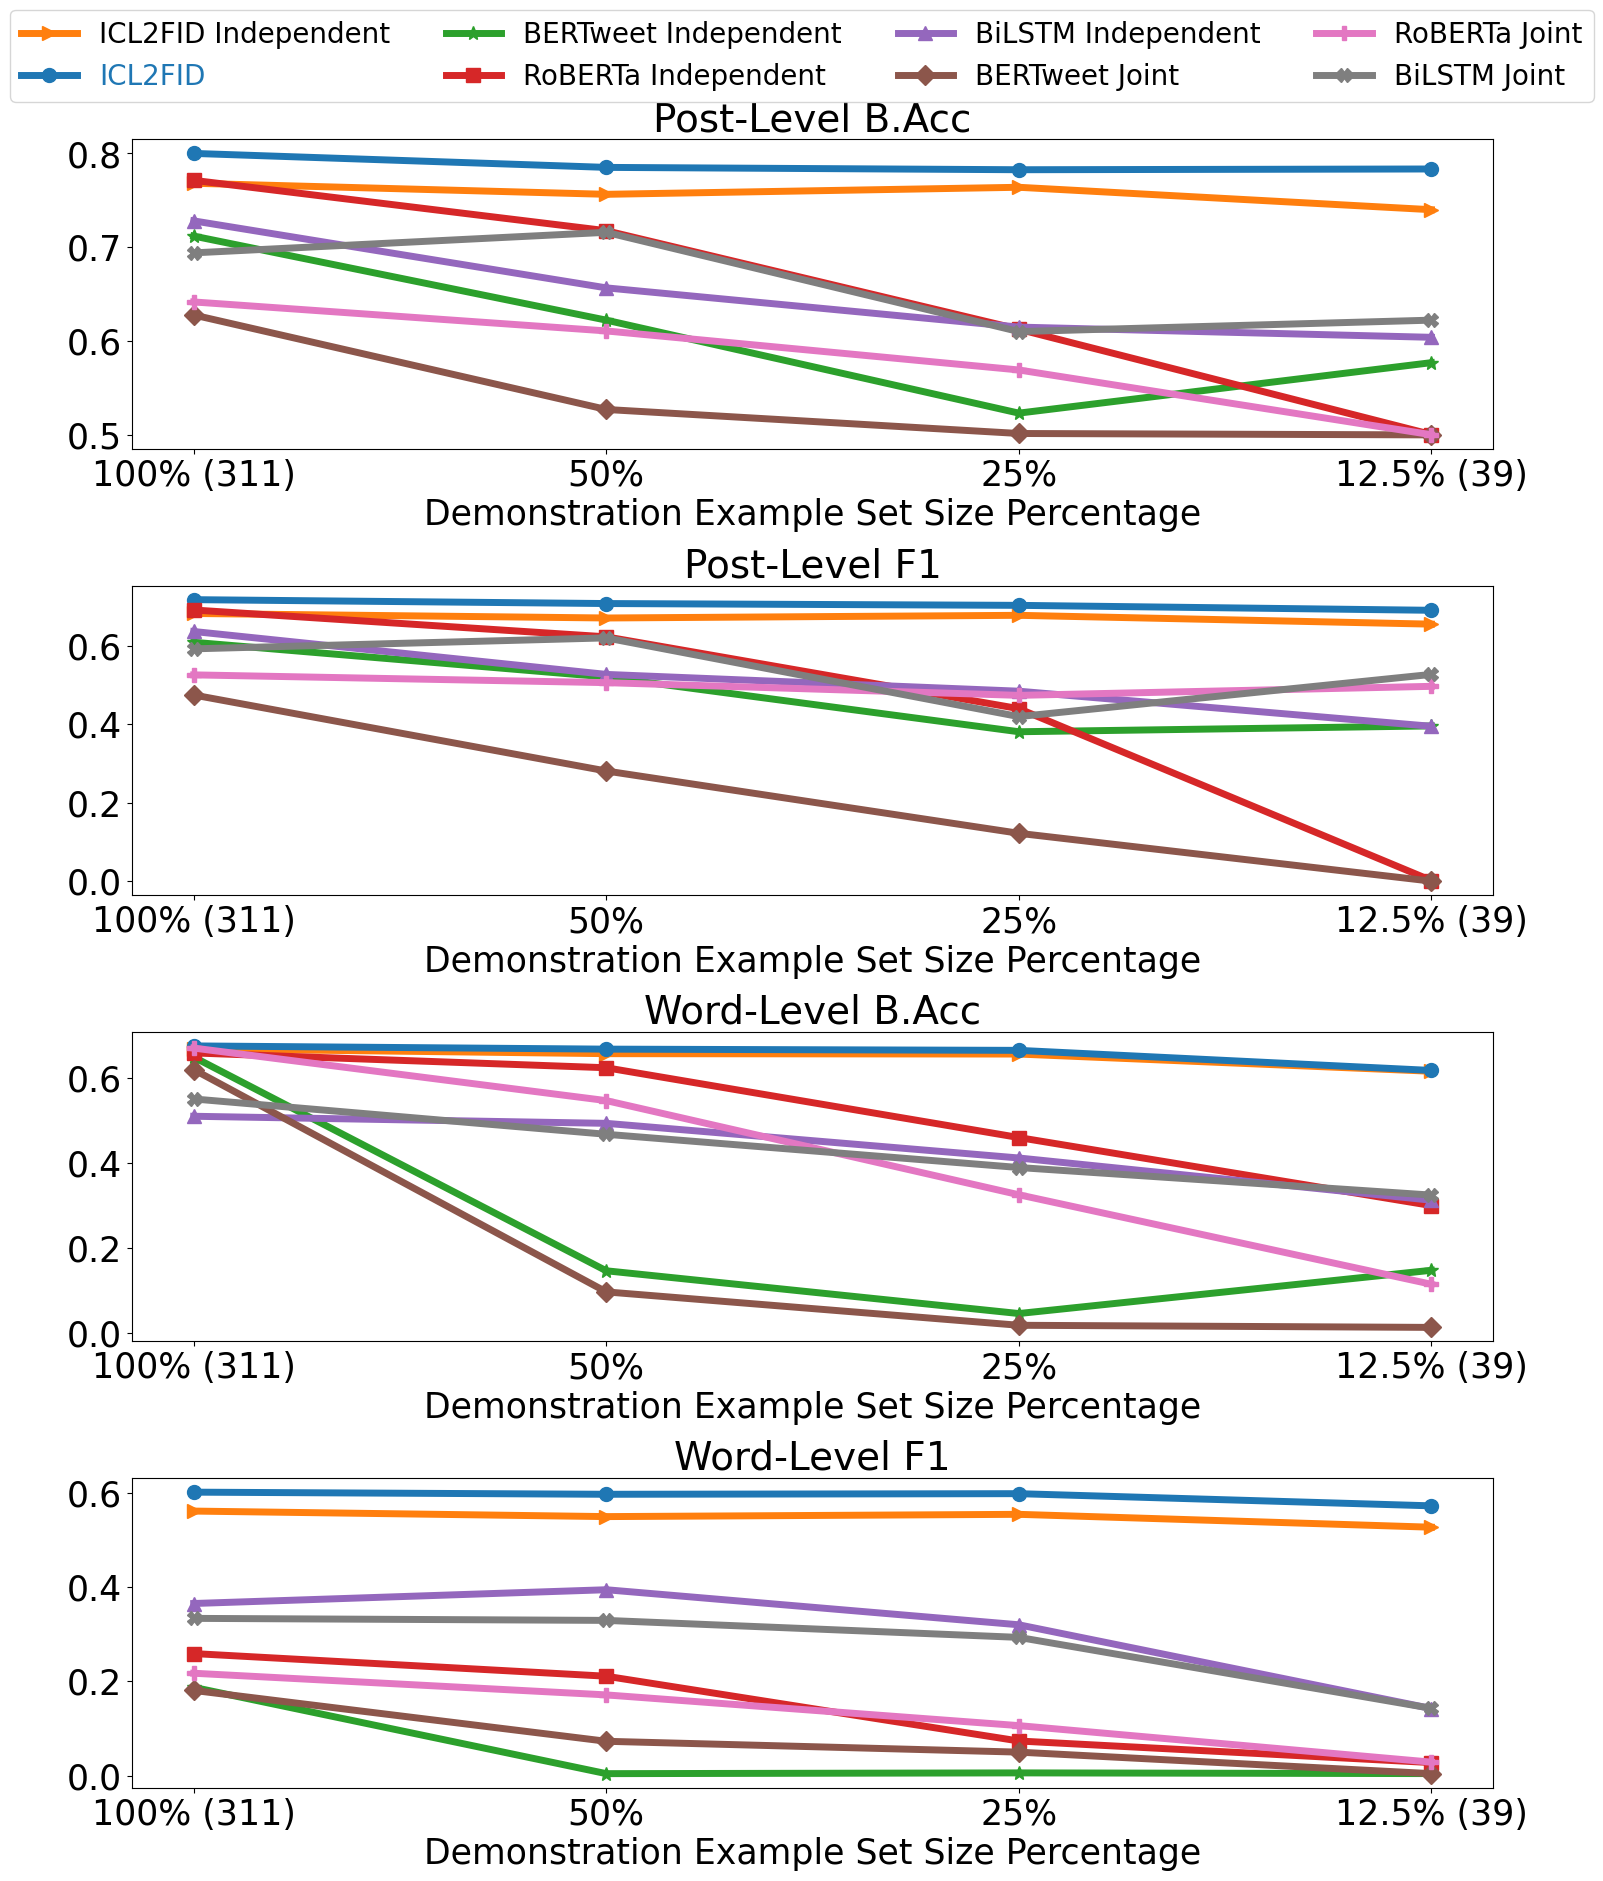

In [62]:
import pandas as pd

# Data provided by the user, parsed from the text
data = {
    'Method': ['Independent', '', 'Independent', 'Independent', 'Independent', 'Joint', 'Joint', 'Joint'],
    'Model': ['ICL2FID', 'ICL2FID', 'BERTweet', 'RoBERTa', 'BiLSTM', 'BERTweet', 'RoBERTa', 'BiLSTM'],
    'Post-Level B.Acc': [[0.7682, 0.7564, 0.7639, 0.74],
                         [0.8, 0.7851, 0.7826, 0.7834],
                         [0.7119, 0.6223, 0.5232, 0.577],
                         [0.7713, 0.7176, 0.6126, 0.5004],
                         [0.7281, 0.6567, 0.6149, 0.604],
                         [0.6278, 0.5271, 0.5015, 0.5],
                         [0.6417, 0.6108, 0.5692, 0.5002],
                         [0.694, 0.7159, 0.6101, 0.6223]],
    'Post-Level F1': [[0.6819, 0.6704, 0.6772, 0.6547],
                      [0.7171, 0.7072, 0.7026, 0.69],
                      [0.6085, 0.5201, 0.3806, 0.3954],
                      [0.6908, 0.6224, 0.4394, 0.0016],
                      [0.636, 0.5267, 0.4839, 0.3945],
                      [0.4742, 0.2806, 0.1219, 0],
                      [0.5255, 0.5057, 0.4733, 0.4963],
                      [0.5918, 0.6197, 0.4192, 0.5267]],
    'Word-Level B.Acc': [[0.6693, 0.6577, 0.6568, 0.6162],
                         [0.676, 0.6684, 0.6655, 0.6181],
                         [0.6496, 0.1457, 0.0449, 0.1469],
                         [0.6594, 0.6245, 0.4599, 0.2995],
                         [0.5101, 0.4934, 0.4117, 0.3121],
                         [0.6201, 0.0959, 0.0172, 0.0122],
                         [0.6709, 0.547, 0.325, 0.1139],
                         [0.5509, 0.4676, 0.3892, 0.3242]],
    'Word-Level F1': [[0.5609, 0.5492, 0.554, 0.5267],
                      [0.601, 0.5965, 0.5978, 0.572],              
                      [0.1873, 0.0044, 0.006, 0.0045],
                      [0.2589, 0.2109, 0.0736, 0.0278],
                      [0.365, 0.3942, 0.3199, 0.1424],
                      [0.1808, 0.073, 0.05, 0.0044],
                      [0.2172, 0.1713, 0.1062, 0.0288],
                      [0.3335, 0.3292, 0.2932, 0.1428]],
    
}

# Convert the data into a Pandas DataFrame for easier manipulation
df = pd.DataFrame(data)

# Percentage levels for the x-axis
percentages = ["100% (311)", "50%", "25%", "12.5% (39)"]

# Prepare to plot
# fig, axs = plt.subplots(2, 2, figsize=(24, 9))
fig, axs = plt.subplots(4, 1, figsize=(15, 18))
axs = axs.flatten()
marker_list = ['>', 'o', '*', 's', '^', 'D', 'P', 'X']

# Plotting each of the performance scores over the percentage
for i, metric in enumerate(['Post-Level B.Acc', 'Post-Level F1', 'Word-Level B.Acc', 'Word-Level F1']):
    ax = axs[i]
    for index, row in df.iterrows():
        ax.plot(percentages, row[metric], label=row['Model'] if row['Method'] == '' else f"{row['Model']} {row['Method']}", marker=marker_list[index], markersize=10, linewidth=5, color=new_color_list[index])
    ax.set_title(metric, fontsize=28)
    ax.tick_params(axis='y', which='major', labelsize=25)
    ax.tick_params(axis='x', which='major', labelsize=25)
    ax.set_xlabel('Demonstration Example Set Size Percentage', fontsize=25)
    # ax.set_ylabel(metric.split(' ')[1], fontsize=20)
    # ax.invert_xaxis()  # To show decreasing percentages from left to right
    # ax.legend()
    if i == 1:
        handles, labels = ax.get_legend_handles_labels()
        legend = fig.legend(handles, labels, bbox_to_anchor=(0.5, 1.05), loc='upper center', ncol=4, fontsize=20)
        for text in legend.get_texts():
            if text.get_text() == 'ICL2FID':
                # text.set_weight('bold')
                text.set_color('#1f77b4')

plt.tight_layout()
# plt.savefig("T3_size_ratio_h.pdf", bbox_inches="tight")
plt.savefig("T3_size_ratio.pdf", bbox_inches="tight")
plt.show()
